# Optimizers

Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

## SGD

Standard gradient descent from Keras.

$ w = w - \alpha dw $

Where $\alpha$ is a learning rate.

In [ ]:
tf.keras.optimizers.SGD(learning_rate=0.01)

## Momentum
Use exponentially weighted moving average for correcting gradients.

Exponentially weighted moving average is usually used for computing trends.

### Example of exponentially weighted moving average on temperatures on London

Load temperatures from files and select only values for year 2020.

In [ ]:
df = pd.read_csv('london_weather.csv')[['date', 'mean_temp']]
df = df.dropna(subset=['mean_temp'])
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df = df[
    (df['date'] >= pd.to_datetime('2020-01-01', format='%Y-%m-%d')) & 
    (df['date'] <= pd.to_datetime('2020-12-31', format='%Y-%m-%d'))]

In [ ]:
df

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(df['date'], df['mean_temp'], label = 'Daily temeperature')
plt.legend()
plt.show()

How to get trend in temperatures?

By introducing moving average!

$ v_t = \beta v_{t-1} + (1- \beta) \theta_t $

$ v $ are moving average temperatures

$ \beta $ is weight

$\theta $ are values - temperature

In [ ]:
def exponentialy_weighted_moving_average(temperatures, beta):
    v = [0]
    for i in range(1, len(temperatures)):
        cur_v = beta * v[i-1] + (1-beta) * temperatures[i]
        v.append(cur_v)
    return v

In [ ]:
df['trend'] = exponentialy_weighted_moving_average(df['mean_temp'].values, 0.9)

In [ ]:
df

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(df['date'], df['mean_temp'], label = 'Daily temperature')
plt.plot(df['date'], exponentialy_weighted_moving_average(df['mean_temp'].values, 0.5), c='red', linewidth=4, label = 'Beta 0.5')
plt.plot(df['date'], exponentialy_weighted_moving_average(df['mean_temp'].values, 0.9), c='orange', linewidth=4, label = 'Beta 0.9')
plt.plot(df['date'], exponentialy_weighted_moving_average(df['mean_temp'].values, 0.98), c='green', linewidth=4, label = 'Beta 0.98')
plt.legend()
plt.title('Temperature in London')
plt.show()

Trend value in a single day is approximately averaging over = $ 1 \over {1 - \beta} $ days temperature.

## SGD with momentum

Uses exponentially weighted moving average for correcting weights instead of using gradients directly.

So instead of:

$w = w - \alpha * dw$

it uses this algorithm for weights update:

$Vw = \beta * Vw - \alpha * dw$

$w = w + Vw$

This will enable to smooth out gradient descent that could result in faster learning and better overcoming of local minima.

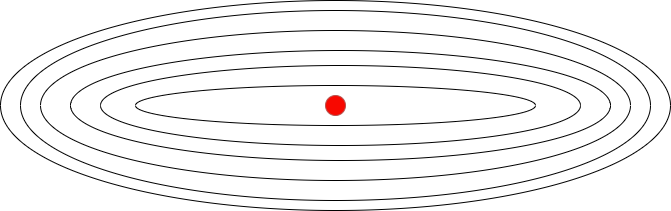

In [ ]:
# Momentum represents Beta
tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.9)

## RMSprop - Root Mean Square Propagation

Helps with correction of gradient to the right direction.

We are again calculating exponentially weighted moving average.

$Sw = \beta Sw - (1-\beta)dw^2$ - element wise squaring

$Sb = \beta Sb - (1-\beta)db^2$

$w= w - \alpha {dw \over {\sqrt {Sw} + \epsilon}}$

$b= b - \alpha {db \over {\sqrt {Sb} + \epsilon}}$

In this illustrative case we want to have slow updates in vertical direction b and fast in horizontal w.

$db$ gradients large - so $ Sb $ is also getting large so ${\sqrt {Sb} + \epsilon}$ scales the gradient down.

$dw$ gradients are low - $Sw$ is also getting low so $ {\sqrt {Sw} + \epsilon} $ promotes bigger updates.

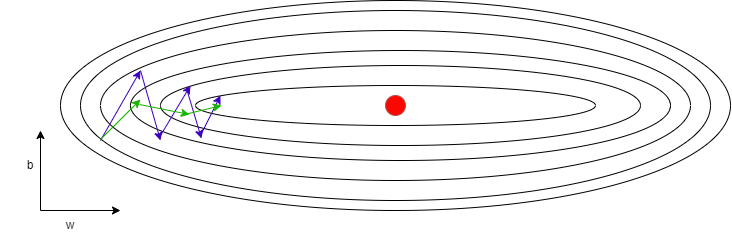

It is able scale learning rate to some degree.

b and w are used in this example just for the sake of clarity - in real life it will be different components of w or b vectors.

In [ ]:
tf.keras.optimizers.RMSprop(learning_rate=0.01)

## Adam

Combines RMSprop with momentum.

One of the most used optimizers because it works nicely on wide range of different problems.

Get momentum for current batch:

$Vw = \beta_1 Vw - (1-\beta_1)dw$

$Vb = \beta_1 Vb - (1-\beta_1)db$

$\beta_1$ - hyperparameter for momentum

Get RMSprop averages

$Sw = \beta_2 Sw - (1-\beta_2)dw^2$

$Sb = \beta_2 Sb - (1-\beta_2)db^2$

$\beta_2$ - hyperparameter for RMSprop averages

Corrects the biases (exponential moving average starts in 0 which is not always desirable, this is fixing that).

$ Vw^{corrected} = {Vw \over (1-\beta_1^t)}$

$ Vb^{corrected} = {Vb \over (1-\beta_1^t)}$

Also correct biases for RMSprop averages

$ Sw^{corrected} = {Sw \over (1-\beta_2^t)}$

$ Sb^{corrected} = {Sb \over (1-\beta_2^t)}$

Use the values for correcting weights

$ w = w - \alpha{Vw^{corrected} \over \sqrt{Sw^{corrected}} + \epsilon}$


$ b = b - \alpha{Vb^{corrected} \over \sqrt{Sb^{corrected}} + \epsilon}$


There is a lot of hyperparameters but usually it is enough to tune just a learning rate and leave the rest with default values.

In [ ]:
tf.keras.optimizers.Adam(learning_rate=0.01)